In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'rbf':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

# TODO: check which ones!

98
95


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
17,1.000,1000.0000,rbf,0.583161,11399,0.582127,1.034400e-03
23,10.000,1000.0000,rbf,0.582304,11399,0.582127,1.772483e-04
26,100.000,1.0000,rbf,0.582841,11399,0.582127,7.137290e-04
32,1000.000,1.0000,rbf,0.582841,11399,0.582127,7.137290e-04
35,1000.000,1000.0000,rbf,0.585014,11399,0.582127,2.887389e-03
62,100.000,1.0000,rbf,0.572695,2645,0.572117,5.780205e-04
63,100.000,10.0000,rbf,0.572199,2645,0.572117,8.198872e-05
88,1.000,100.0000,rbf,0.548778,9069,0.548773,5.484599e-06
94,10.000,100.0000,rbf,0.548780,9069,0.548773,6.855748e-06
105,1000.000,10.0000,rbf,0.548773,9069,0.548773,3.330669e-16


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.558478
10470,0.596540
10484,0.552533
10508,0.583550
10795,0.625942
1080,0.600288
10887,0.567956
11038,0.588559
1113,0.577347


In [7]:
bests = []
df_best_agg = df.groupby('stock', as_index=False)['diff'].idxmax()
df_bests = df.loc[df_best_agg]
df_bests.index = df_bests['stock']

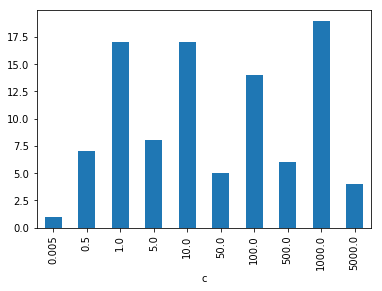

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

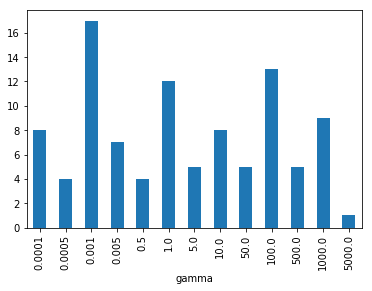

In [9]:
df_bests.groupby('gamma')['gamma'].count().plot(kind='bar')

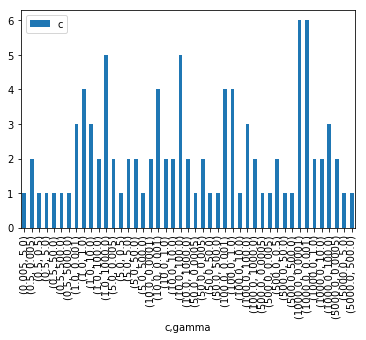

In [10]:
df_bests.groupby(['c', 'gamma'])[['c']].count().plot(kind='bar')

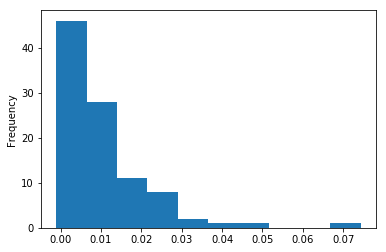

In [11]:
df_bests['diff'].plot(kind='hist')

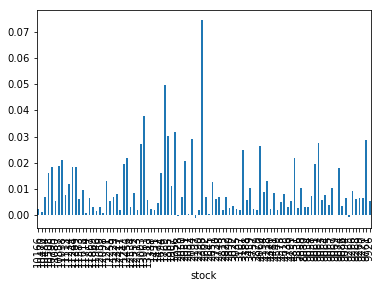

In [12]:
df_bests['diff'].plot(kind='bar')

In [13]:
df.sort_values(by='diff')

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
3390,0.0010,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3384,0.0001,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3385,0.0001,0.0010,rbf,0.500000,2028,0.616323,-0.116323
3386,0.0001,1.0000,rbf,0.500000,2028,0.616323,-0.116323
3387,0.0001,10.0000,rbf,0.500000,2028,0.616323,-0.116323
3388,0.0001,100.0000,rbf,0.500000,2028,0.616323,-0.116323
3389,0.0001,1000.0000,rbf,0.500000,2028,0.616323,-0.116323
3391,0.0010,0.0010,rbf,0.500000,2028,0.616323,-0.116323
3396,1.0000,0.0001,rbf,0.500000,2028,0.616323,-0.116323
3392,0.0010,1.0000,rbf,0.500000,2028,0.616323,-0.116323


In [14]:
df_bests.sort_values(by='diff')

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
stock,,,,,,,
2197,1000.0,0.0010,rbf,0.613768,2197,0.614852,-0.001084
9265,10.0,0.0001,rbf,0.545582,9265,0.546440,-0.000858
2028,1000.0,0.0001,rbf,0.616177,2028,0.616323,-0.000146
9069,10.0,100.0000,rbf,0.548780,9069,0.548773,0.000007
2645,100.0,1.0000,rbf,0.572695,2645,0.572117,0.000578
2057,100.0,1.0000,rbf,0.572373,2057,0.571769,0.000605
12098,0.5,0.0050,rbf,0.612709,12098,0.611904,0.000805
11714,1000.0,0.0001,rbf,0.586752,11714,0.585856,0.000897
10470,1.0,1.0000,rbf,0.596540,10470,0.595373,0.001167
